# 30 News - Represent & Extract Knowledge

---

### Project Participant

* Mentor: Hatim CHAHDI
* E-mail: hatim.chahdi@intervenants.efrei.fr

* EFREI Paris
* Master 2 Class of 2019
* Business Intelligence (Group 1)

* Student 1: CAI Yutong
* Student ID: 20140589
* E-mail: yutong.cai@efrei.net

* Student 2: WANG Shimeng
* Student ID: 20140607
* E-mail:shimeng.wang@efrei.net

### Project Description
The objectives of this project are "Represent knowledge using RDF, RDFS and OWL" and "Extract knowledge from text using Naîve Bayes and SVM". First we collected 30 news of various categories on the CNN and BBC websites (these types are the same as the news types in the fetch_20newsgroups dataset). In order to categorize these news texts, we used two classification algorithms, Naîve Bayes and SVM, and we used the fetch_20newsgroups dataset as our model training set. To get a better classifier, we used NLTK for text preprocessing and used Grid Search to find better model hyperparameters during training. We tried a lot of methods to build RDF files in Python. Finally we chose to build our RDF files using RDFLib, and RDFLib provides a simpler way to do SPARQL query.

---

## PART 1. Import and Display Self-built Dataset

### 1.0. Self-built Dataset Description

A total of 30 news articles in the data set are used to test the training results of "fetch_20newsgroups" on the model. All news was selected from the BBC and CNN news, which are divided into the following ten categories, each with three news articles.
* 2.'comp.os.ms-windows.misc'
* 6.'misc.forsale'
* 7.'rec.autos'
* 8.'rec.motorcycles'
* 9.'rec.sport.baseball'
* 10.'rec.sport.hockey'
* 15.'soc.religion.christian'
* 16.'talk.politics.guns'
* 17.'talk.politics.mideast'
* 18.'talk.politics.misc'

### 1.1 Import Self-built Dataset

In [1]:
import pandas as pd

df_news30 = pd.read_csv('news30.csv')

### 1.2 Display Self-built Dataset

In [2]:
df_news30.head()

,category,title,author,newspaper,time,content
0,2,Windows 10 release,Unknown,BBC News,12-Nov-18,The much delayed Windows 10 October 2018 updat...
1,2,Microsoft ends retail sales of Windows 7 and 8,Unknown,BBC News,3-Nov-14,Microsoft has officially stopped selling retai...
2,2,Microsoft gives up on Windows 10 Mobile,Leo Kelion,BBC News,9-Oct-17,Microsoft appears to have abandoned its smartp...
3,6,Kodak sale of flexographic packaging business,Ciara Linnane,CNN News,12-Nov-18,"Eastman Kodak Co.'s shares KODK, +18.45% soare..."
4,6,"Private messages from 81,000 hacked Facebook a...",Andrei Zakharov,BBC News,2-Nov-18,Hackers appear to have compromised and publish...


#### 1.2.1. View Dataset Shape

In [3]:
df_news30.shape

(30, 6)

#### 1.2.2. View Column Names

In [4]:
df_news30.columns

Index(['category', 'title', 'author', 'newspaper', 'time', 'content'], dtype='object')

#### 1.2.3. View Target Names

In [5]:
df_news30.category.unique()

array([ 2,  6,  7,  8,  9, 10, 15, 16, 17, 18])

---

## PART 2. Text Classification Using Machine Learning Algorithms

### 2.0. Reference material

* Removing stop words with NLTK in Python: https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
* Relationship between CountVectorizer, TfidfTransformer, TfidfVectorizer: http://www.voidcn.com/article/p-qedmavfk-bmq.html
* CountVectorizer & TfidfVectorizer in Scikit-learn: https://blog.csdn.net/the_lastest/article/details/79093407
* Python string and list conversion: https://www.cnblogs.com/wills666/p/7007740.html
* Python np.array and list conversion: https://blog.csdn.net/baiyu9821179/article/details/53365476
* Python numpy array indexing: https://www.cnblogs.com/McKean/p/6412164.html
* Use GridSearch to adjust parameters: https://blog.csdn.net/weixin_36541072/article/details/70052493
* Save and load Sklearn model: https://blog.csdn.net/qq_32005671/article/details/72774306
* Draw bar graph with matplotlib: https://www.cnblogs.com/cymwill/p/6808178.html
* Plt axis setting: https://www.jb51.net/article/129823.htm
* Double bar graph add value label: http://www.manongjc.com/article/2278.html
* Number formatted output: https://www.cnblogs.com/Raymon-Geng/p/5784290.html

### 2.1. NLTK Function Setting

In [6]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/caiyutong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/caiyutong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

In [8]:
from nltk.tokenize import word_tokenize

def NltkTransform(input_array):
    
    words_list = []

    for words in input_array:
        word_tokens = word_tokenize(words)
        filtered_sentence = [w for w in word_tokens if not w in stop_words]
        words_list.append(' '.join(filtered_sentence))
    
    nltk_array = np.array(words_list)
    
    return nltk_array

### 2.2. Import Training & Testing Dataset

In [9]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups(subset='all')

In [10]:
import numpy as np

# X = news.data
# y = news.target

X = NltkTransform(news.data)
y = news.target

### 2.3. Separation Dataset

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

### 2.4. Build Pipeline & Model Training / Grid Search Model Training

* The machine learning model has been saved in file, you don't need to train the model again.
* If you want to save time, please skip this section (2.4) and start with the code in section 2.5.

#### 2.4.1. Build Pipeline for MultinomialNB & Model Training

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

mnb_clf = Pipeline([
    ('vect', CountVectorizer()), 
    ('tfidf', TfidfTransformer()), 
    ('mnb', MultinomialNB())
])

mnb_clf = mnb_clf.fit(X_train, y_train)

In [ ]:
from sklearn.externals import joblib
# Save machine learning model
joblib.dump(mnb_clf, "mnb_clf.m")

#### 2.4.2. Build Pipeline for LinearSVC & Model Training

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
    ('vect', CountVectorizer()), 
    ('tfidf', TfidfTransformer()), 
    ('svc', LinearSVC())
])

svm_clf = svm_clf.fit(X_train, y_train)

In [ ]:
from sklearn.externals import joblib
# Save machine learning model
joblib.dump(svm_clf, "svm_clf.m")

#### 2.4.3. Grid Search for MultinomialNB

In [ ]:
print(sorted(mnb_clf.get_params().keys()))

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)], 
    'tfidf__use_idf': (True, False), 
    'mnb__alpha': (1e-2, 1e-3)
}

In [ ]:
gs_mnb_clf = GridSearchCV(mnb_clf, parameters, n_jobs=-1)
gs_mnb_clf = gs_mnb_clf.fit(X_train, y_train)

In [ ]:
from sklearn.externals import joblib
# Save machine learning model
joblib.dump(gs_mnb_clf, "gs_mnb_clf.m")

In [ ]:
print(gs_mnb_clf.best_score_)
print(gs_mnb_clf.best_params_)

In [ ]:
gs_best_mnb_clf = gs_mnb_clf.best_estimator_

In [ ]:
from sklearn.externals import joblib
# Save machine learning model
joblib.dump(gs_best_mnb_clf, "gs_best_mnb_clf.m")

#### 2.4.4. Grid Search for LinearSVC

In [ ]:
print(sorted(svm_clf.get_params().keys()))

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = { 
    'vect__ngram_range': [(1, 1), (1, 2)], 
    'tfidf__use_idf': (True, False),
    'svc__C':[0.1, 1, 10], 
} 

In [ ]:
gs_svm_clf = GridSearchCV(svm_clf, parameters, n_jobs=-1)
gs_svm_clf = gs_svm_clf.fit(X_train, y_train)

In [ ]:
from sklearn.externals import joblib
# Save machine learning model
joblib.dump(gs_svm_clf, "gs_svm_clf.m")

In [ ]:
print(gs_svm_clf.best_score_)
print(gs_svm_clf.best_params_)

In [ ]:
gs_best_svm_clf = gs_svm_clf.best_estimator_

In [ ]:
from sklearn.externals import joblib
# Save machine learning model
joblib.dump(gs_best_svm_clf, "gs_best_svm_clf.m")

### 2.5. Evaluate the Model with Testing Data

In [12]:
from sklearn.externals import joblib

In [13]:
mnb_clf = joblib.load("mnb_clf.m")

In [14]:
svm_clf = joblib.load("svm_clf.m")

In [15]:
gs_best_mnb_clf = joblib.load("gs_best_mnb_clf.m")

In [16]:
gs_best_svm_clf = joblib.load("gs_best_svm_clf.m")

#### 2.5.1. MultinomialNB Model Evaluation

In [17]:
mnb_y_predict = mnb_clf.predict(X_test)

In [18]:
print("Accuracy of MultinomialNB:", mnb_clf.score(X_test, y_test))
print()

from sklearn.metrics import classification_report
print(classification_report(y_test, mnb_y_predict, target_names=news.target_names))

Accuracy of MultinomialNB: 0.8769100169779287

                          precision    recall  f1-score   support

             alt.atheism       0.86      0.79      0.82       201
           comp.graphics       0.84      0.79      0.82       250
 comp.os.ms-windows.misc       0.84      0.88      0.86       248
comp.sys.ibm.pc.hardware       0.77      0.88      0.82       240
   comp.sys.mac.hardware       0.93      0.87      0.90       242
          comp.windows.x       0.95      0.88      0.92       263
            misc.forsale       0.91      0.79      0.84       257
               rec.autos       0.89      0.91      0.90       238
         rec.motorcycles       0.98      0.94      0.96       276
      rec.sport.baseball       0.97      0.93      0.95       251
        rec.sport.hockey       0.88      0.99      0.93       233
               sci.crypt       0.82      0.97      0.89       238
         sci.electronics       0.91      0.86      0.88       249
                 sci.med    

#### 2.5.2. LinearSVC Model Evaluation

In [19]:
svm_y_predict = svm_clf.predict(X_test)

In [20]:
print("Accuracy of LinearSVC:", svm_clf.score(X_test, y_test))
print()

from sklearn.metrics import classification_report
print(classification_report(y_test, svm_y_predict, target_names=news.target_names))

Accuracy of LinearSVC: 0.9291171477079796

                          precision    recall  f1-score   support

             alt.atheism       0.93      0.89      0.91       201
           comp.graphics       0.87      0.85      0.86       250
 comp.os.ms-windows.misc       0.89      0.90      0.90       248
comp.sys.ibm.pc.hardware       0.83      0.84      0.83       240
   comp.sys.mac.hardware       0.91      0.92      0.91       242
          comp.windows.x       0.91      0.91      0.91       263
            misc.forsale       0.88      0.90      0.89       257
               rec.autos       0.93      0.93      0.93       238
         rec.motorcycles       0.98      0.96      0.97       276
      rec.sport.baseball       0.97      0.96      0.96       251
        rec.sport.hockey       0.96      0.99      0.97       233
               sci.crypt       0.96      0.97      0.96       238
         sci.electronics       0.92      0.92      0.92       249
                 sci.med       0

#### 2.5.3. Best MultinomialNB Model Grid Search Evaluation

In [21]:
gs_best_mnb_y_predict = gs_best_mnb_clf.predict(X_test)

In [22]:
print("Accuracy of Best Grid Search LinearSVC:", gs_best_mnb_clf.score(X_test, y_test))
print()

from sklearn.metrics import classification_report
print(classification_report(y_test, gs_best_mnb_y_predict, target_names=news.target_names))

Accuracy of Best Grid Search LinearSVC: 0.9157470288624788

                          precision    recall  f1-score   support

             alt.atheism       0.93      0.93      0.93       201
           comp.graphics       0.77      0.82      0.79       250
 comp.os.ms-windows.misc       0.82      0.87      0.84       248
comp.sys.ibm.pc.hardware       0.84      0.87      0.85       240
   comp.sys.mac.hardware       0.90      0.90      0.90       242
          comp.windows.x       0.90      0.87      0.88       263
            misc.forsale       0.91      0.82      0.86       257
               rec.autos       0.92      0.93      0.92       238
         rec.motorcycles       0.98      0.95      0.96       276
      rec.sport.baseball       0.97      0.94      0.96       251
        rec.sport.hockey       0.94      0.98      0.96       233
               sci.crypt       0.96      0.96      0.96       238
         sci.electronics       0.91      0.93      0.92       249
               

#### 2.5.4. Best LinearSVC Model Grid Search Evaluation

In [23]:
gs_best_svm_y_predict = gs_best_svm_clf.predict(X_test)

In [24]:
print("Accuracy of Best Grid Search LinearSVC:", gs_best_svm_clf.score(X_test, y_test))
print()

from sklearn.metrics import classification_report
print(classification_report(y_test, gs_best_svm_y_predict, target_names=news.target_names))

Accuracy of Best Grid Search LinearSVC: 0.9333616298811545

                          precision    recall  f1-score   support

             alt.atheism       0.94      0.91      0.92       201
           comp.graphics       0.85      0.86      0.86       250
 comp.os.ms-windows.misc       0.91      0.91      0.91       248
comp.sys.ibm.pc.hardware       0.84      0.85      0.85       240
   comp.sys.mac.hardware       0.90      0.93      0.92       242
          comp.windows.x       0.93      0.92      0.92       263
            misc.forsale       0.88      0.92      0.90       257
               rec.autos       0.94      0.93      0.94       238
         rec.motorcycles       0.99      0.95      0.97       276
      rec.sport.baseball       0.96      0.95      0.96       251
        rec.sport.hockey       0.96      0.98      0.97       233
               sci.crypt       0.96      0.97      0.97       238
         sci.electronics       0.93      0.92      0.92       249
               

#### 2.5.5. Use Chart to Display Classification Accuracy

In [25]:
import matplotlib.pyplot as plt

accuracy_normal = [mnb_clf.score(X_test, y_test), svm_clf.score(X_test, y_test)]
accuracy_gridsearch = [gs_best_mnb_clf.score(X_test, y_test), gs_best_svm_clf.score(X_test, y_test)]

len_accuracy_list = 2
x = np.arange(len_accuracy_list)

group_width = 0.4
bar_width = group_width / len_accuracy_list
x = x - (group_width - bar_width) / 2

bar_normal = plt.bar(x, accuracy_normal,  width=bar_width, label='Normal')
bar_gridsearch = plt.bar(x + bar_width, accuracy_gridsearch, width=bar_width, label='Grid Search')

def value_label(bars):
    for bar in bars:
        x = bar.get_x()
        width = bar.get_width()
        height = bar.get_height()
        plt.text(x+width/2-0.08, 1.03*height, '%.4f' % float(height))

value_label(bar_normal)
value_label(bar_gridsearch)        

plt.ylim(0, 1.1)
plt.xticks(x + bar_width / 2, ['Naîve Bayes', 'SVM'])
plt.ylabel("Accuracy")
plt.title("Model Classification Accuracy Comparison")

plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

### 2.6. Import Real Data (News30)

In [26]:
news30_X = NltkTransform(np.array(df_news30['title'] +" "+ df_news30['content'])) # X_real = title + content
news30_y = np.array(df_news30['category'])

In [27]:
news30_y

array([ 2,  2,  2,  6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10,
       10, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18])

### 2.7. Evaluate the Model with Real Data

In [28]:
news30_target_names = ['comp.os.ms-windows.misc',
                       'misc.forsale','rec.autos',
                       'rec.motorcycles',
                       'rec.sport.baseball',
                       'rec.sport.hockey',
                       'soc.religion.christian',
                       'talk.politics.guns',
                       'talk.politics.mideast',
                       'talk.politics.misc']

#### 2.7.1. MultinomialNB Model Evaluation

In [29]:
mnb_news30_y_predict = mnb_clf.predict(news30_X)

In [30]:
mnb_news30_y_predict

array([ 2,  2,  2,  6, 11, 11, 11,  7,  9,  8, 15,  8,  9,  9,  9, 10, 10,
       10, 15, 15, 15, 16, 16, 16, 17, 17, 17, 17, 18, 15])

In [31]:
print("Accuracy of MultinomialNB:", mnb_clf.score(news30_X, news30_y))
print()

from sklearn.metrics import classification_report
print(classification_report(news30_y, mnb_news30_y_predict, 
                            target_names=np.array(news.target_names)[np.sort(np.unique(mnb_news30_y_predict))]))

Accuracy of MultinomialNB: 0.7666666666666667

                         precision    recall  f1-score   support

comp.os.ms-windows.misc       1.00      1.00      1.00         3
           misc.forsale       1.00      0.33      0.50         3
              rec.autos       1.00      0.33      0.50         3
        rec.motorcycles       1.00      0.67      0.80         3
     rec.sport.baseball       0.75      1.00      0.86         3
       rec.sport.hockey       1.00      1.00      1.00         3
              sci.crypt       0.00      0.00      0.00         0
 soc.religion.christian       0.60      1.00      0.75         3
     talk.politics.guns       1.00      1.00      1.00         3
  talk.politics.mideast       0.75      1.00      0.86         3
     talk.politics.misc       1.00      0.33      0.50         3

            avg / total       0.91      0.77      0.78        30



/Users/caiyutong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### 2.7.2. LinearSVC Model Evaluation

In [32]:
svm_news30_y_predict = svm_clf.predict(news30_X)

In [33]:
svm_news30_y_predict

array([ 2,  2,  2,  6,  6,  6,  9,  7,  9,  8,  8,  8,  9,  9,  9, 10, 10,
       10, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18])

In [34]:
print("Accuracy of LinearSVC:", svm_clf.score(news30_X, news30_y))
print()

from sklearn.metrics import classification_report
print(classification_report(news30_y, svm_news30_y_predict, 
                            target_names=np.array(news.target_names)[np.sort(np.unique(svm_news30_y_predict))]))

Accuracy of LinearSVC: 0.9333333333333333

                         precision    recall  f1-score   support

comp.os.ms-windows.misc       1.00      1.00      1.00         3
           misc.forsale       1.00      1.00      1.00         3
              rec.autos       1.00      0.33      0.50         3
        rec.motorcycles       1.00      1.00      1.00         3
     rec.sport.baseball       0.60      1.00      0.75         3
       rec.sport.hockey       1.00      1.00      1.00         3
 soc.religion.christian       1.00      1.00      1.00         3
     talk.politics.guns       1.00      1.00      1.00         3
  talk.politics.mideast       1.00      1.00      1.00         3
     talk.politics.misc       1.00      1.00      1.00         3

            avg / total       0.96      0.93      0.93        30



#### 2.7.3. Best MultinomialNB Model Grid Search Evaluation

In [35]:
gs_best_mnb_news30_y_predict = gs_best_mnb_clf.predict(news30_X)

In [36]:
gs_best_mnb_news30_y_predict

array([ 2,  2,  2,  6, 11, 18, 11,  7, 14,  8, 17,  8,  9,  9,  9, 10, 10,
       10, 15, 15, 17, 16, 16, 16, 17, 17, 17, 17, 18, 18])

In [37]:
print("Accuracy of MultinomialNB:", gs_best_mnb_clf.score(news30_X, news30_y))
print()

from sklearn.metrics import classification_report
print(classification_report(news30_y, gs_best_mnb_news30_y_predict, 
                            target_names=np.array(news.target_names)[np.sort(np.unique(gs_best_mnb_news30_y_predict))]))

Accuracy of MultinomialNB: 0.7666666666666667

                         precision    recall  f1-score   support

comp.os.ms-windows.misc       1.00      1.00      1.00         3
           misc.forsale       1.00      0.33      0.50         3
              rec.autos       1.00      0.33      0.50         3
        rec.motorcycles       1.00      0.67      0.80         3
     rec.sport.baseball       1.00      1.00      1.00         3
       rec.sport.hockey       1.00      1.00      1.00         3
              sci.crypt       0.00      0.00      0.00         0
              sci.space       0.00      0.00      0.00         0
 soc.religion.christian       1.00      0.67      0.80         3
     talk.politics.guns       1.00      1.00      1.00         3
  talk.politics.mideast       0.50      1.00      0.67         3
     talk.politics.misc       0.67      0.67      0.67         3

            avg / total       0.92      0.77      0.79        30



/Users/caiyutong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### 2.7.4. Best LinearSVC Model Grid Search Evaluation

In [38]:
gs_best_svm_news30_y_predict = gs_best_svm_clf.predict(news30_X)

In [39]:
gs_best_svm_news30_y_predict

array([ 2,  2,  2,  6,  6,  6,  7,  7,  9,  8,  8,  8,  9,  9,  9, 10, 10,
       10, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18])

In [40]:
print("Accuracy of LinearSVC:", gs_best_svm_clf.score(news30_X, news30_y))
print()

from sklearn.metrics import classification_report
print(classification_report(news30_y, gs_best_svm_news30_y_predict, 
                            target_names=np.array(news.target_names)[np.sort(np.unique(gs_best_svm_news30_y_predict))]))

Accuracy of LinearSVC: 0.9666666666666667

                         precision    recall  f1-score   support

comp.os.ms-windows.misc       1.00      1.00      1.00         3
           misc.forsale       1.00      1.00      1.00         3
              rec.autos       1.00      0.67      0.80         3
        rec.motorcycles       1.00      1.00      1.00         3
     rec.sport.baseball       0.75      1.00      0.86         3
       rec.sport.hockey       1.00      1.00      1.00         3
 soc.religion.christian       1.00      1.00      1.00         3
     talk.politics.guns       1.00      1.00      1.00         3
  talk.politics.mideast       1.00      1.00      1.00         3
     talk.politics.misc       1.00      1.00      1.00         3

            avg / total       0.97      0.97      0.97        30



#### 2.7.5. Use Chart to Display Classification Accuracy

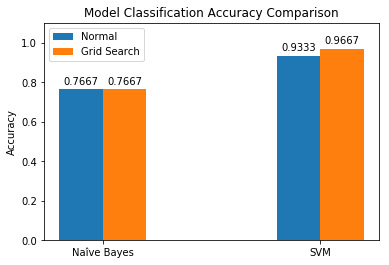

In [41]:
import matplotlib.pyplot as plt

accuracy_normal = [mnb_clf.score(news30_X, news30_y), svm_clf.score(news30_X, news30_y)]
accuracy_gridsearch = [gs_best_mnb_clf.score(news30_X, news30_y), gs_best_svm_clf.score(news30_X, news30_y)]

len_accuracy_list = 2
x = np.arange(len_accuracy_list)

group_width = 0.4
bar_width = group_width / len_accuracy_list
x = x - (group_width - bar_width) / 2

bar_normal = plt.bar(x, accuracy_normal,  width=bar_width, label='Normal')
bar_gridsearch = plt.bar(x + bar_width, accuracy_gridsearch, width=bar_width, label='Grid Search')

def value_label(bars):
    for bar in bars:
        x = bar.get_x()
        width = bar.get_width()
        height = bar.get_height()
        plt.text(x+width/2-0.08, 1.03*height, '%.4f' % float(height))

value_label(bar_normal)
value_label(bar_gridsearch)        

plt.ylim(0, 1.1)
plt.xticks(x + bar_width / 2, ['Naîve Bayes', 'SVM'])
plt.ylabel("Accuracy")
plt.title("Model Classification Accuracy Comparison")

plt.legend()
plt.show()

### 2.8. Predict Function

In [42]:
def predict_result(i):
    print(news.target_names[int(gs_best_svm_clf.predict([news30_X[i]]))])

In [43]:
predict_result(0)

comp.os.ms-windows.misc


---

## PART 3. Build RDF & SPARQL Query

### 3.0. Reference material
* RdfLib Document: https://rdflib.readthedocs.io/en/stable/index.html
* Use RDFLib Create & Query RDF: https://blog.csdn.net/vuscity/article/details/79869828

### 3.1. Create RDF

* Make sure you have installed RDFLib before running the following code.
* If not, please use “pip install rdflib” for installation.

#### 3.1.1. Build RDF Graph

In [44]:
from rdflib import URIRef, Literal

Article = []
category = []
title = []
author = []
newspaper = []
time = []
content = []

for i in range(df_news30.shape[0]):
    Article.append(URIRef("http://example.org/article/Article_" + str(i)))
    category.append(Literal(str(df_news30['category'][i])))
    title.append(Literal(df_news30['title'][i]))
    author.append(Literal(df_news30['author'][i]))
    newspaper.append(Literal(df_news30['newspaper'][i]))
    time.append(Literal(df_news30['time'][i]))
    content.append(Literal(df_news30['content'][i]))

In [45]:
from rdflib.namespace import FOAF

print(FOAF.Article)
print(FOAF.category)
print(FOAF.title)
print(FOAF.author)
print(FOAF.newspaper)
print(FOAF.time)
print(FOAF.content)

http://xmlns.com/foaf/0.1/Article
http://xmlns.com/foaf/0.1/category
http://xmlns.com/foaf/0.1/title
http://xmlns.com/foaf/0.1/author
http://xmlns.com/foaf/0.1/newspaper
http://xmlns.com/foaf/0.1/time
http://xmlns.com/foaf/0.1/content


In [46]:
from rdflib import Graph

g = Graph()

for i in range(df_news30.shape[0]):
    g.add((Article[i], FOAF.category, category[i] ))
    g.add((Article[i], FOAF.title, title[i] ))
    g.add((Article[i], FOAF.author, author[i] ))
    g.add((Article[i], FOAF.newspaper, newspaper[i] ))
    g.add((Article[i], FOAF.time, time[i] ))
    g.add((Article[i], FOAF.content, content[i] ))
    
g.serialize()

b'<?xml version="1.0" encoding="UTF-8"?>\n<rdf:RDF\n   xmlns:ns1="http://xmlns.com/foaf/0.1/"\n   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"\n>\n  <rdf:Description rdf:about="http://example.org/article/Article_28">\n    <ns1:newspaper>CNN News</ns1:newspaper>\n    <ns1:category>18</ns1:category>\n    <ns1:title>Barack Obama asked the question everyone\'s been wondering about the Republican Party</ns1:title>\n    <ns1:content>(CNN)"What happened to the Republican Party?"\nThat\'s the question former President Barack Obama asked in a speech at the University of Illinois on Friday, taking direct aim at not only the presidency of Donald Trump but also at the broader Republican Party\'s capitulation to him.\nIt\'s easy to dismiss Obama\'s speech on Friday as nothing more than a disgruntled politician settling scores in an effort to motivate his side to turn out in the coming midterm elections. "Barack Obama had 8 years to complete his hope &amp; change in America, and the only 

#### 3.1.2. Handling Special Characters

In [47]:
graph_output = str(g.serialize())
graph_output = graph_output[2:-1]
graph_output = graph_output.replace('\\n','')
graph_output

'<?xml version="1.0" encoding="UTF-8"?><rdf:RDF   xmlns:ns1="http://xmlns.com/foaf/0.1/"   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">  <rdf:Description rdf:about="http://example.org/article/Article_28">    <ns1:newspaper>CNN News</ns1:newspaper>    <ns1:category>18</ns1:category>    <ns1:title>Barack Obama asked the question everyone\\\'s been wondering about the Republican Party</ns1:title>    <ns1:content>(CNN)"What happened to the Republican Party?"That\\\'s the question former President Barack Obama asked in a speech at the University of Illinois on Friday, taking direct aim at not only the presidency of Donald Trump but also at the broader Republican Party\\\'s capitulation to him.It\\\'s easy to dismiss Obama\\\'s speech on Friday as nothing more than a disgruntled politician settling scores in an effort to motivate his side to turn out in the coming midterm elections. "Barack Obama had 8 years to complete his hope &amp; change in America, and the only change agent 

#### 3.1.3. Use Tools to Format and Validate RDF XML

* XML Formatter: https://www.webtoolkitonline.com/xml-formatter.html
* XML Validator: https://www.xmlvalidation.com/

### 3.2. Save RDF Graph

In [48]:
file = open('News30.rdf', 'w', encoding='utf-8')
file.write(graph_output)
file.close()

### 3.3. SPARQL Query

#### 3.3.1 Load RDF Document

In [49]:
import rdflib

In [50]:
g = rdflib.Graph()
g.load("News30.rdf")

#### 3.3.2. Query RDF

In [51]:
qres = g.query(
    """
    SELECT ?a ?b
    WHERE 
    {
        ?a foaf:title ?b .
    }
    """,initNs = { "foaf": FOAF }
)

for row in qres:
    print("%s title: %s" % row)

http://example.org/article/Article_27 title: The dangerous consequences of Trump\'s all-out assault on political correctness
http://example.org/article/Article_28 title: Barack Obama asked the question everyone\'s been wondering about the Republican Party
http://example.org/article/Article_4 title: Private messages from 81,000 hacked Facebook accounts for sale
http://example.org/article/Article_16 title: Four Nations: Ireland in back-to-back Dutch defeats
http://example.org/article/Article_18 title: Lent Fast Facts
http://example.org/article/Article_8 title: Meet the new, profitable, Tesla
http://example.org/article/Article_22 title: 11-year-old fatally shot grandmother then himself, grandfather tells police
http://example.org/article/Article_23 title: Police kill gunman who wounded four at municipal building in Pennsylvania
http://example.org/article/Article_13 title: Robinson Cano: $240m baseball star banned for 80 games for failed drugs test
http://example.org/article/Article_21 tit

#### 3.3.3. Query RDF with PrepareQuery

In [52]:
from rdflib.plugins.sparql import prepareQuery

In [53]:
q = prepareQuery(
    'SELECT ?a ?b WHERE { ?a foaf:title ?b . }',
    initNs = { "foaf": FOAF })

for row in g.query(q):
        print("%s title: %s" % row)

http://example.org/article/Article_27 title: The dangerous consequences of Trump\'s all-out assault on political correctness
http://example.org/article/Article_28 title: Barack Obama asked the question everyone\'s been wondering about the Republican Party
http://example.org/article/Article_4 title: Private messages from 81,000 hacked Facebook accounts for sale
http://example.org/article/Article_16 title: Four Nations: Ireland in back-to-back Dutch defeats
http://example.org/article/Article_18 title: Lent Fast Facts
http://example.org/article/Article_8 title: Meet the new, profitable, Tesla
http://example.org/article/Article_22 title: 11-year-old fatally shot grandmother then himself, grandfather tells police
http://example.org/article/Article_23 title: Police kill gunman who wounded four at municipal building in Pennsylvania
http://example.org/article/Article_13 title: Robinson Cano: $240m baseball star banned for 80 games for failed drugs test
http://example.org/article/Article_21 tit

---

# -END-